<center> <h1>Master Informatique Specialités WISD (DD avec EID2)</h1>


---


**Web Mining**  

---



**Topic Detection**

---

<h2>By : Lamgarraj Mohamed </h2>


In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/drive/My Drive/WeBMining/data.csv')

In [ ]:
from itertools import chain
import re
import pickle
 
# In[]
# Medical lists

orthopaedic=['الركبه',  'خشونه',  'خشونه الركبه',  'الركبة',  'قطع',  'الظهر',  'غضروف',  'الخشونه',  'مفاصل',  'تمزق',  'المشي',  'خشونة',  'الركبتين',  'غضروف الركبه',  'السلم',  'تاكل',  'تيبس',  'خشونة الركبه',  'الغضروف',  'حقن',  'القدم',  'تاكل الركبه',  'الكتف',  'قطع غضروف',  'الفقري',  'تغير',  'تفاصيل',  'فقرات',  'وتورم',  'الضهر',  'المفاصل',  'امشي',  'خشونه المفاصل',  'اقف',  'رنين',  'الساقين',  'الصوابع',  'الكتفين',  'المفصل',  'رجلي',  'الرقبه',  'الهلالي',  'قطع الغضروف',  'خشونه الركبة',  'وتاكل',  'عظام',  'القدمين',  'الفخد',  'طلوع السلم',  'طلوع',  'ركبتي',  'الحركه',  'تنميل',  'الحوض',  'صوت',  'بالكتف',  'الرباط',  'انزلاق',  'ايدي',  'الغضروف الهلالي',  'الصليبي',  'الخشونة',  'الرباط الصليبي',  'كشف',  'والكوع',  'بلازما',  'عنقيه',  'الفقرات',  'منظار',  'الرجل',  'خشونه الركبتين',  'النسا',  'غضروف الركبة',  'الرقبة',  'الساق',  'كتفي',  'عرق',  'والرقبه',  'ركبي',  'وخشونة',  'عنقي',  'غضروفي',  'رقبتي',  'الركب',  'رقبه',  'انزلاق غضروفي',  'اخد',  'بتعملي',  'القطنيه',  'والكتف',  'وتنميل',  'واسفل',  'فقرات الرقبة'] 
cardiology=['قلب',  'ضربات',  'ضربات قلب',  'عضله قلب',  'عضله',  'مفتوح',  'قلب مفتوح',  'الشراين',  'سريعه',  'التاجي',  'قلب سريعه',  'خفقان',  'رسم قلب',  'رسم',  'تضخم',  'قلبي',  'الصمام',  'انسداد',  'ايكو',  'الصدر',  'شراين',  'القدمين',  'مرض',  'لضعف',  'دعامة',  'دقات',  'ثقب',  'عطلة قلب',  'الضغط قلب',  'عظلة قلب',  'عضلات',  'وامراض قلب',  'نبضات',  'قلب السكر',  'نبضات قلب',  'دقات قلب',  'بامراض قلب',  'وضربات',  'عدم انتظام',  'مرض قلب',  'التنفس',  'الشريان',  'قلب العلاج',  'قسطرة',  'انتظام ضربات',  'قلب المفتوح',  'المفتوح',  'تنفس',  'صدري',  'دعامات',  'قلب عادي',  'تغير الصمام',  'السريعه',  'عضلت',  'ونهجان',  'العضله',  'ضيق التنفس',  'والضغط',  'تصلب',  'تصلب الشراين',  'جلطة',  'بعضلة قلب',  'بعضلة',  'كونكور',  'نهجان',  'سريع',  'الصمام المترالي',  'المترالي',  'الاورطي',  'الصمام الاورطي',  'الشريان التاجي',  'وضيق',  'وبنهج','عضلة',  'عضلة قلب',  'قلب',  'تضخم عضلة',  'تضخم',  'علاجها',  'نبضات',  'نبضات قلب'] 
gastroenterology=['تضخم',  'تقرحات',  'جرثومه المعده',  'الجنب',  'الحجاب الحاجز',  'جرثومة',  'المري',  'القولون',  'ارتجاع',  'انتفاخ وغازات',  'وارتجاع',  'بالقولون',  'بعاني القولون',  'والتهابات',  'التهابات المعده',  'جرثومة المعدة',  'قولون',  'حمام',  'العصبي وانتفاخ',  'وقولون',  'وارتجاع المرئ',  'هضم',  'التقرحي',  'العصبي',  'جرثومه',  'انتفاخات وغازات',  'المراره',  'تكميم',  'وارتجاع المري',  'غازات',  'المعدة وارتجاع',  'المعده القولون',  'الجرثومه',  'عصبي',  'دهون البطن',  'ورم',  'والقولون',  'المعده',  'حلزوني',  'التهابات',  'شرخ',  'الاعصاب',  'الحجاب',  'وتقلصات',  'انتفاخ البطن',  'انتفاخات',  'بالمنظار',  'فتق',  'تكميم المعده',  'المعده والقولون',  'تكميم المعدة',  'قولون عصبي',  'اسهال',  'البطن',  'براز',  'وانتفاخ دائم',  'وامساك',  'واسهال',  'الاكل',  'علاجه',  'وقرحه',  'اكل بيتعبني',  'المريء',  'اكل',  'التهاب المعده',  'دهون',  'ارتجاع المرئ',  'للقولون العصبي',  'ارتجاع المريء',  'استئصال',  'انتفاخ',  'الحمام',  'دهون الكبد',  'امساك',  'مرئ',  'كشفت',  'الحاجز',  'الكبد',  'القولون العصبي',  'المستقيم',  'وغازات',  'للقولون',  'وانتفاخ',  'البروستاتا',  'المرئ',  'بطني',  'الغده',  'المعدة',  'جراحه',  'البراز',  'والمعده',  'معدتي',  'جدار',  'والقولون العصبي',  'منظار'] 
diabets=['السكر',  'الضغط',  'انسولين',  'السكر وضغط',  'وضغط',  'السكر الضغط',  'تحليل',  'قلب السكر',  'تحليل السكر',  'ارتفاع',  'السكر والضغط',  'والضغط',  'عنده السكر',  'قياس',  'عالي',  'المريض',  'وتزيد خطر',  'الضغط وتزيد',  'قلب وتصلب',  'مريضة السكر',  'وقلب',  'منخفض',  'السكري',  'العلوية',  'قريب'] 
dental=['العقل',  'ضرس',  'خلع',  'ضرس العقل',  'خلع ضرس',  'حشو',  'العصب',  'زرع',  'الضرس',  'كلي',  'السن',  'الخلع',  'زراعه',  'حشو ضرس',  'ببنج',  'زراعة',  'وفيه',  'الاعصاب',  'وتركيب',  'تركيب',  'ضروس',  'عصب',  'وعايز',  'بنج كلي',  'الفك',  'بنج',  'ازرع',  'مكسور',  'لضرس',  'السفلي',  'الاسنان',  'بالفك',  'تبيض',  'العلوي',  'خلع الاسنان',  'ضرسين',  'والاسنان',  'السن الواحد',  'طفل عمره',  'تتكلف كام',  'تتكلف',  'الحاله',  'عمره',  'البالون',  'تنظيف الاسنان',  'تركيب',  'تلبيس',  'تقويم الاسنان',  'تنظيف',  'تقويم',  'زراعة الاسنان',  'زراعة',  'الاسنانالسن',  'زراعه',  'زراعه الاسنان',  'حشو',  'تبيض',  'الفك',  'الاسنان وكم',  'ضروس',  'زرع الاسنان',  'تبيض الاسنان',  'السن الواحد',  'الجير',  'بتخديرعام',  'تنظيف وتبيض',  'زرعة',  'وحشو',  'اربع الاسنان',  'والباقي تلبيس',  'والاسنان',  'زراعة السن',  'حشو الاسنان',  'تلبيسة',  'اللثة',  'ضرس',  'خلع',  'وتنظيف',  'وتركيب',  'وتبيض',  'التبيض',  'الامامية',  'الاسنان نوع',  'الاسنان الفك',  'الاسنان الامامية',  'العلوي',  'السفلي',  'ازرع',  'الاسنان كامله',  'الاسنان كامل',  'الاسنان تلبيس',  'الاسنان تركيب',  'الاسنان تدخل',  'الاسنان تابع',  'الاسنان امامية',  'الاسنان اللبنيه',  'الاسنان الجير',  'الاسنان الاماميه',  'الاسنان الاسنان',  'اركب',  'التنظيف',  'الاماميه',  'امامية',  'اللبنيه',  'الفك السفلي',  'تلبيسة الاسنان',  'طقم الاسنان',  'ضروس زراعه',  'لثة',  'كامله',  'كامل الاسنان',  'قلع',  'فم',  'وزراعة الاسنان',  'وزراعة',  'وحشو الاسنان',  'وتنظيف والباقي',  'وتبيض الاسنان'] 
# Dictionary
medical=orthopaedic+cardiology+gastroenterology+diabets+dental

Medical_conslut = set(list(np.unique(medical,axis=0) )+ ['sonar', 'الم',  'الاسنان', 'التركيبات', 'زرع' , 'العلاج', 'القولون',  'الركبه',  'الم',  'القلب',  'شديد',  'الحل',  'عمليه',  'اسنان',  'المعده',  'خشونه',  'الشمال',  'القولون',  'وعملت',  'الم',  'شديد',  'الركبة',  'عملية',  'مفصل',  'العصبي',  'والم',  'الكتف',  'الظهر',  'اسفل',  'المعدة',  'الالم',  'القولون',  'العصبي',  'اليمين',  'التهاب',  'ارتجاع',  'خشونة',  'خشونه',  'طبيعي',  'الاعراض',  'الصدر',  'البطن',  'مشكله',  'سكر',  'تحت',  'غضروف',  'كتفي',  'مشكلة',  'الايسر',  'العمليه',  'قولون',  'الركبتين',  'قلب',  'تنميل',  'رجلي',  'ارتجاع',  'ضعف',  'الام',  'بطني',  'نتيجه',  'بحس',  'اسفل',  'الظهر',  'ضغط',  'ورم',  'الرقبه',  'تركيب',  'السكر',  'منظار',  'طبيعي',  'مزمن',  'التهاب',  'مستمر',  'باستمرار',  'الغضروف',  'صدري',  'خشونه',  'الركبه',  'ضرس',  'تحليل',  'مشكله',  'النوم',  'العملية',  'حرقان',  'بقالي',  'زراعة',  'التهابات',  'اليمني',  'حقن',  'جامد',  'امساك',  'ايدي',  'اريد',  'قطع',  'وباخد',  'امشي',  'عندها',  'بنتي',  'الكلي',  'عضلة',  'واخدت',  'قولون',  'الحاله',  'عظام',  'والقولون',  'القدم',  'اعاني',  'اليسري',  'اشعه',  'اسناني',  'رنين',  'طب',  'شديدة',  'تعبانه',  'طبيب',  'دم',  'خشونة',  'فايده',  'علشان',  'الضغط',  'الدم',  'شويه',  'عضله',  'والام',  'كبير',  'امراض',  'واخذت',  'باخد',  'تغير',  'عصبي',  'اقل',  'البول',  'عالي',  'العقل',  'مرض',  'تقويم',  'وارتجاع',  'الفقري',  'فوق',  'تعبني',  'بعاني',  'وغازات',  'قلبي',  'الكبد',  'عضلة',  'القلب',  'المشي',  'الحوض',  'الايمن',  'فقرات',  'انتفاخ',  'المفاصل',  'ضربات',  'جراحه',  'الوزن',  'امساك',  'الغدة',  'وعايز',  'اثناء',  'مشكلة',  'حرقان',  'اسنان',  'تعب',  'للقولون',  'دلوقتي',  'العظام',  'جسمي',  'دواء',  'الجسم',  'اليد',  'وانتفاخ',  'الفقرات',  'ضربات',  'القلب',  'جراحة',  'الرقبة',  'الثه',  'واخدت',  'الطبيب',  'والعلاج',  'تمزق',  'عضله',  'القلب',  'اللثة',  'جامده',  'وضغط',  'فايده',  'التنفس',  'خفقان',  'العصب',  'تلبيس',  'خلع',  'سبب',  'قطع',  'المرئ',  'العمود',  'اعراض',  'التهابات',  'ركبتي',  'تاكل',  'الساقين',  'كسر',  'شديده',  'مشاكل',  'الام',  'سكر',  'الم',  'الركبه',  'شرخ',  'تضخم',  'الاعصاب',  'عمليات',  'دهون',  'القدمين',  'جلسات',  'ورم',  'غضروف',  'وامساك',  'وبحس',  'واعصاب',  'مخ',  'التحليل',  'مخ',  'واعصاب',  'اسهال',  'تعبان',  'الرحم',  'العمود',  'الفقري',  'كشفت',  'والكتف',  'المفصل',  'سكر',  'وضغط',  'اليمن',  'وتعبت',  'العلوي',  'لسه',  'السلم',  'حشو',  'الورم',  'وطلع',  'شراين',  'الركبه',  'الشمال',  'مفاصل',  'الحمام',  'انسداد',  'زرع',  'ارتفاع',  'واخذت',  'البراز',  'لحد',  'نزيف',  'تعبت',  'تغير',  'مفصل',  'تعمل',  'والتهابات',  'الاسنان',  'زراعه',  'الالام',  'بيجي',  'عصب',  'تنظيف',  'الدوالي',  'دائم',  'بالم',  'واخد',  'اقل',  'الفك',  'رقبتي',  'جرثومة',  'ضغط',  'اعلي',  'اطباء',  'الغده',  'وجود',  'دوالي',  'الاثنين',  'الحمل',  'الفخد',  'هضم',  'تنميل',  'الشريان',  'حمل',  'الشعر',  'ضعف',  'اشاعه',  'حامل',  'تحاليل',  'النسا',  'صوت',  'عمليه',  'يدي',  'الدرقية',  'مفصل',  'الركبه',  'القولون',  'الصمام',  'القولون',  'علاجه',  'اورام',  'خارج',  'مرات',  'الشراين',  'وتورم',  'وضعف',  'شديد',  'مفتوح',  'السكري',  'الوجع',  'كيس',  'مسالك',  'تعباني',  'وكشفت',  'الرباط',  'وضيق',  'مفصل',  'الحوض',  'التنفس',  'فم',  'الكعب',  'معدتي',  'والالم',  'المراره',  'ضعف',  'عضلة',  'تكميم',  'حالتي',  'الفقره',  'العصبي',  'المعده',  'الركبة',  'الشمال',  'الجراحة',  'صداع',  'اسنان',  'ضروس',  'وباخد',  'الدهون',  'فتق',  'الركبه',  'اليمين',  'قولون',  'عصبي',  'المطلوب',  'حرقان',  'البول',  'المخ',  'المستقيم',  'نقص',  'الجهاز',  'انام',  'تيبس',  'المري',  'الذراع',  'الحقن',  'الجلسات',  'رنين',  'المريء',  'الضهر',  'فتق',  'تكاليف',  'بالمنظار',  'امساك',  'مزمن',  'والم',  'شديد',  'جرثومه',  'الم',  'الكتف',  'تبيض',  'قلب',  'مفتوح',  'براز',  'حصوات',  'للاسنان',  'النخاع',  'دموية',  'جدار',  'وخشونة',  'ضرسين',  'ورحت',  'طبيب',  'الاسنان',  'زراعة',  'الاسنان',  'انزلاق',  'العلاج',  'صدر',  'وقلبي',  'ارتجاع',  'المرئ',  'الكاحل',  'حمام',  'تقويم',  'الاسنان',  'العلاج',  'الجلد',  'مرتين',  'التهابات',  'المعده',  'عضلات',  'بالكتف',  'الم',  'مستمر',  'كورونا',  'الم',  'مفصل',  'ورجلي',  'ذراعي',  'وحرقان',  'جرثومة',  'المعدة',  'جرثومه',  'ليفي',  'اندلسيه',  'بيروح',  'جيوب',  'الضرس',  'والتهاب',  'الثدي',  'حركه',  'تقرحات',  'الكتفين',  'بنهج',  'رقبه',  'ملتهب',  'مرئ',  'عرق',  'الم',  'الاشعة',  'الراس',  'وخدت',  'شديد', 'التلبيسه', 'القيصري', 'وتلبيسه', 'لاستئصال',  'الكتف',  'الكتف',  'الايسر',  'قسطرة',  'سكر',  'الشوكي',  'بتوجعني',  'اشيل',  'جرثومه',  'المعده',  'اليدين',  'الناس',  'تسوس',  'الهلالي',  'الايد',  'دوخه',  'العضلات',  'انتفاخ',  'بمستشفي',  'الركب',  'الهضمي',  'الفحوصات',  'عيادة',  'استئصال',  'للعلاج' ,'علاج' ,  'اشاعة',  'المسالك',  'باخذ',  'ضهري',  'دراعي',  'تورم',  'التقويم',  'مسكنات',  'وارتجاع',  'المري',  'اوعية',  'مفصل',  'الفخد',  'واسفل',  'اليسار',  'والضغط',  'يحتاج',  'الحركه',  'الفقرة',  'سكري',  'مفصل',  'الكتف',  'الم',  'التاجي',  'ثلاثه',  'وقالي',  'وتنميل',  'نهجان',  'الصليبي',  'كلي',  'اسفل',  'البطن',  'وعملت',  'منظار',  'الكوع',  'مكسور',  'العراق',  'بينزل',  'عظام',  'بول',  'ركبه',  'الرنين',  'الجنب',  'تحليل',  'اللثه',  'التقرير',  'ضعف',  'مياه',  'النخاع',  'الشوكي',  'رجلي',  'الشمال',  'العين',  'اختصاص',  'التحاليل',  'الحاجز',  'ادوية',  'المزمن',  'الاماميه',  'مسالك',  'باطنه',  'خشونه',  'الركبتين',  'فقرات',  'الرقبة',  'حالات',  'مسكن',  'دعامات',  'البالون',  'جلطة',  'بطن',  'قطع',  'الغضروف',  'جلطه',  'الورك',  'بحرقان',  'تنفس',  'التقرحي',  'غضروف',  'الركبه',  'والرقبه',  'جلسه',  'هشاشه',  'دعامة',  'ارتخاء',  'يغطي',  'وضربات',  'عمليه', 'عندي', 'دواللي',  'اناعندي'])
insurance = set(['تامين', 'عندكم', 'عندكم', 'تامين', 'التعاونيه', 'تامين', 'التعاونيه', 'لديكم', 'تامين', 'التامين', 'تامين', 'تامين', 'عندكم', 'يقبل', 'التعاونية', 'يشمل', 'تامين', 'التعاونية', 'عندكم', 'يغطي', 'تقبلو', 'شركة', 'عندكم', 'تقبلو', 'تامين', 'عندكم', 'الراجحي', 'تامين', 'تامين', 'صحي', 'شركات', 'تقبلون', 'تامين', 'صحي', 'تقبلون', 'تامين', 'متوفر', 'ميد', 'تامين', 'ميد', 'تقبل', 'كلاس', 'تتعاملوا', 'عندكم', 'عندكم', 'تبع', 'تكافل', 'يقبل', 'تامين', 'فئة', 'تامين', 'كلاس', 'تامين', 'تكافل', 'مقبول', 'تكافل', 'الراجحي', 'تعاقد', 'تابع', 'عندكم', 'تتعاملون', 'تقبلوا', 'عندكم', 'متاح', 'عندكم', 'لديكم', 'جهاز', 'بطاقة', 'شركه', 'عندكوا', 'خصم', 'للتامين', 'ميد', 'تامين', 'بالتقسيط', 'عندكم', 'ميد', 'متعاقدين', 'التامين', 'عندكم', 'شركات', 'التامين', 'عيادة', 'عندكن', 'اسوي', 'توجد', 'الصحي', 'موجوده', 'التامين', 'الصحي', 'جهاز', 'بتامين', 'اماكن', 'الكورونا', 'استفيد', 'التعامل', 'ارغب', 'بالتامين', 'كورونا', 'لشركة', 'التامينات', 'عيادات', 'اختصاص', 'الخاصة', 'الصحه', 'تبع', 'التامين', 'استفسر', 'تسجيل', 'كرونا', 'ضمن', 'انتو', 'الهضمي', 'بتتعاملوا', 'تتعاملو', 'التامين', 'العروض', 'التامين', 'يشمل', 'insurance'])
insurance = set(re.sub(r'((ال)?كو?رو?نا)', '', " ".join(insurance)).split())
Booking_inquiry = set(['العرض', 'رقم', 'تفاصيل', 'خدمة', 'حجزت', 'متواجد', 'ميعاد', 'التركيبات', 'تكلفتها', 'جوالي', 'سجلت', 'خصومات', 'سعر', 'التليفون', 'لحجز', 'كم', 'وكم', 'تليفون', 'للحجز', 'عرض', 'الخدمة', 'موعد', 'سعرها', 'التكاليف', 'احجز', 'مناسب', 'والاسعار', 'اتواصل', 'تكلف', 'سعره', 'التفاصيل', 'وبكم', 'تلفون', 'الهاتف', 'اسعار', 'التواصل', 'عايزه', 'السعر', 'حجز', 'اخر', 'الموعد', 'ارسال', 'نحجز', 'مواعيد', 'زرع', 'كلف', 'تتكلف', 'تكلفة', 'الحجز', 'وكام', 'عروض', 'التكلفة', 'يكلف', 'ماهي', 'عاوز', 'الرقم', 'معرفة', 'كام', 'ارقام', 'وقت', 'تكلفه', 'التكلفه', 'مبلغ', 'بكم', 'بدي', 'جوال', 'بكام', 'book'])
place_inquiry = set(['موجود', 'عنو', 'روح', 'مك', 'مكان', 'فرع', 'فين', 'موقع', 'وين'] + ['موقع', 'الاسكندريه', 'اسكندريه', 'موقعكم', 'فرع', 'المكان', 'فروعكم', 'عنوانكم', 'اندلسيه', 'وين', 'التحلية', 'الموقع', 'الاسكندرية', 'وفين', 'جده', 'مصر', 'الاندلسيه', 'مكانكم', 'مكان', 'القاهره', 'بالقاهرة', 'عنوان', 'مكانها', 'المكرونه', 'فضلك', 'واين', 'الفرع', 'الجامعه', 'السعودية', 'حي', 'سموحه', 'بجده', 'فرعكم', 'جدة', 'مكه', 'الشلالات', 'المركز', 'والمكان', 'المعادي', 'فين', 'مدينة', 'اين', 'الاندلسية', 'بحي', 'الرياض', 'اسكندرية', 'العنوان', 'القاهرة','العنوان_والكشف', 'سموحة', 'عيادة'] + ['place', 'where', 'hospital', 'clinic'])

datetime = set(['ساع', 'مت', 'معاد', 'ميعاد', 'موعد', 'مواعيد', 'وقت' ,'تخر'] + ['ميعاد', 'بموعد', 'الموعد', 'متاخر', 'بخدماتهم', 'الساعة', 'الحظور', 'موعدي', 'عشي', 'وقت', 'طائرتي', 'المغادرة', '12ص', 'بوقت', 'مبكر', 'مواعيد', 'المواعيد', 'وصول', 'طائرتنا', 'يقفلونه', '11ص', 'ساعتين', 'الوصول', 'احتجاجي', 'الخروج', 'ويتصلون', 'الفجر', 'الباص', 'المواعيد', 'موعد', 'ومواعيد', '1ص', 'اوقات', 'ومواعيدهم'] + ['مواعيدة', 'ممكن_مواعيد', 'المعاد', 'ممكن_المواعيد', 'الموعد', 'لمواعيد'] + [ 'اوقات', 'توقيت', 'بوقت', 'زمن', 'ساعتين', 'موعد', 'الوقت', 'فترة', 'اثناء', 'لوقت', 'كريسماس', 'ساعات', 'الساعه_ظهرا', 'بامس', 'موسم', 'وجيز', 'يوم', 'وقتا', 'ساعه', 'اضاعه'] + ['ساعه', 'ساعتين', 'دقيقة', 'ساعات', 'الحظور', 'دقائق', 'الساعة', 'اسبوع', 'نص_ساعه', 'نصف_ساعة', 'ساعة_تقريبا', '15_دقيقة', 'اربع_ساعات', 'ساعة_ونصف', 'ثلاث_ساعات', '10_دقائق', 'دقيقه', 'ساعة_كاملة', 'انتظرت', 'الساعه'] + ['appointment', 'an_appointment', 'appointments', 'today', 'day', 'morning', 'emergency_appointment', 'get_an', 'now', 'same_day', 'time', 'waiting', 'waited', 'date', 'dates', 'when'])
price = set(['ماد' ,'دفع' ,'مبلغ','مبالغ', 'ثمن','تمن', 'كام' ,'كم', 'بكم', 'كلف', 'سعر', 'جنيه', 'ريال', 'خصم', 'غال', 'فلس', 'مجان','مجا', 'رخص'] + ['تكلفة', 'بتكلفة', 'سعر', 'التكلفة', 'تكاليف', 'تكلفة_عملية', 'اسعار', 'بكلف', 'اسعارها', 'يورو', 'وتكلفة', 'كلفة', 'مقابل', 'القيمة', 'اجرة', 'تكلفه'] + ['بالسعر', 'دراهم', 'القيمة','السعر', 'بسعر', 'اسعار', 'سعره', 'ريال', 'درهم', 'وسعر', 'مبلغ', 'المبلغ', 'تكلفة', 'غالي_جدا', 'القيمه', 'لسعر', 'المدفوع', 'سعر_الغرفة', 'والسعر', 'الاسعار', 'سعرها', 'ب35'] + ['الاسعار', 'سعر', 'اسعاره', 'غاليه', 'واسعار', 'باسعار', 'السعر', 'اسعارها', 'والاسعار', 'تكلفة', 'مرتفعة_جدا', 'سعره', 'مرتفعة', 'غالية', 'بسعر', 'ارتفاع_اسعار', 'غلاء', 'مبالغ_فيها', 'رسوم', 'بخمسه', 'مرتفعه', 'ارتفاع'] + ['غالي', 'غالي_جدا', 'السعر_غالي', 'غويلي', 'باهض', 'وغالي', 'مرتفع', 'غالية', 'مبالغ_فيه', 'غاليه', 'غال', 'ولاتستحق', 'سعره', 'غير_مجاني', 'الثمن'] + ['الميزانيه', 'رخيصة', 'جنيه', 'رخيص' ,'مكلفة' , 'ارخص', 'منخفض'] + [ 'مجانا', 'مجانية', 'بفلوس', 'المجاني', 'ليس_مجاني', 'مجانيه','غير_مجاني', 'مجاني', 'بالمجان'] + ['6250', 'جنية', 'ب18', 'ريال', 'درهم', 'يورو', 'وسبعون', '60', 'روبية', 'ب30', 'جنيها', 'دولار', 'رنجت', 'جنيهات', 'تكاليف', 'اربعمائة', 'جنيها_مصريا', 'بالريال'] + ['يكلف', 'التكاليف', 'خصومات', 'التكلفه', 'كلف', 'كم', 'كام', 'وبكم', 'تتكلف', 'تكلف', 'العرض', 'عرض', 'عروض', 'تكلفتها', 'بكم', 'وكم', 'وكام','كام', 'الفراكشنال', 'كام_سعر', 'بكام_لو', 'وبكام', 'سعر_الجلسة', 'ممكن_سعر', 'بتتكلف', 'البلصه',  'لكام', 'سعرالكشف', 'اعرف_الكشف', 'كام_لو', 'بكام'] + ['prices', 'expenditure', 'expensive', 'cost', 'pence', 'small_price', 'pay', 'charges', 'price', 'how_much'])
service = set(['خدم', 'دري', 'مدير', 'ادار', 'الاداره', 'نتظار', 'نتظر',  'شخيص' ,'طويل', 'استقبال' ,'معامل'] + ['ومايستاهل', 'الهدوؤ', 'مايستاهل', 'جداموقع', 'ولاتستحق', 'وغير_نظيف', 'ظعيفه', 'غير_نظيف', 'الاثاث_قديم', 'نظيف'] + ['الواي_فاي', 'انترنت', 'متاح', 'فطور', 'النت', 'افطار', 'وسونا', 'الانترنت'] + ['تعامل', 'الاستقبال', 'موظف_الاستقبال', 'موظفي_الاستقبال', 'تعاملهم', 'طاقم_الاستقبال', 'معاملة', 'موظفين_الاستقبال', 'كل_شي', 'تعامل_الاستقبال', 'موظفين', 'والاستقبال', 'الريسبشن', 'طاقم_العمل', 'مستوي_النظافة', 'الغرفالنظافة', 'متعاون', 'جداتعامل', 'والتعامل', 'كتعامل', 'وبشاشه', 'المعامله', 'شي', 'تعامل_موظفي', 'ومتعاون', 'ظيقه', 'تسكين', 'تعامل_موظف', 'بالقهوه', 'ا_ستقبال'] + ['موظفين_الاستقبال', 'تعامله', 'والتعامل', 'والاستقبال', 'التعامل_مع', 'تعامل', 'الاستقبال', 'طاقم_العمل', 'الطاقم', 'المعاملة', 'الموظفين', 'تعاملهم', 'تعامل_الاستقبال', 'موظفي_الاستقبال', 'النزلاء', 'طاقم_الاستقبال', 'وتعاملهم', 'التعمل', 'بالتعامل', 'لاشي', 'تعامل_الموظفين', 'التعاون', 'النظافه', 'السرير_صغير', 'العاملين', 'المعامله', 'موضفوا', 'جداتعامل', 'موظف_الاستقبال', 'ضعيف_جدا', 'استقبال'] + ['الخدمه', 'الخدمات', 'النظافة', 'والخدمة', 'خدمة', 'خدمات', 'النظافه', 'نظافة_الغرف', 'والنظافة', 'الخدمة_سيئة', 'خدمات_الغرف', 'والخدمه', 'وخدمة', 'والخدمات', 'الاستقبال', 'الغرف', 'خدمة_الغرف', 'موظفي_الاستقبال', 'طاقم_العمل', 'المعاملة', 'الواي_فاي', 'الموقع', 'خدمة_الانترنت', 'واستجابتهم', 'الاطلالة', 'والنظافه', 'ومستلزماته', 'الاثاث', 'والشبكة'] + ['خدمات', 'وخدمة', 'الخدمة', 'خدمه', 'نظافة', 'الخدمات', 'خدمة_الغرف', 'وخدمات', 'وجعل_الكتب', 'ضعيفعدم', 'فندق', 'اجتماعي_يقودة', 'والافطار', 'الافطار_جيد', 'نظافة_الغرف', 'وخدمة_الغرف', 'والخدمة', 'مخيب_للامل', 'لخدمة', 'واي_فاي', 'النظافه', 'الخدمه', 'وخدمه', 'خدمة_تنظيف', 'خدمة', 'خدمة_غرف'] + ['service', 'services', 'care', 'this_surgery', 'treatment', 'surgery', 'this_practice', 'practice', 'professional', 'clinic', 'receptionists', 'doctors', 'reception_staff', 'level_of'])
structure  = set(['موقف', 'مواقف', 'مصعد', 'دور', 'مبن', 'زدحام', 'زحم'] + ['ازدحام', 'زحمة', 'مزحوما', 'زحام', 'بضوضاء', 'زحمه'] + ['موقف', 'مواقف', 'مصعد', 'دور', 'مبن', 'زدحام', 'زحم', 'دورةالمياه', 'باركنغ'] + ['مواقف_السيارات', 'زحمة', 'مزحوما', 'زحام', 'بضوضاء', 'زحمه', 'وازدحام', 'الاختناقات', 'تاخير' , 'المكشوفه', 'ضجيج', 'المصاعد', 'الزحام', 'مزدحم', 'والزحام', 'زححمه'] + ['ومواقف', 'المواقف', 'مواقف_سيارات', 'مواقف_للسيارات', 'موقف', 'والمواقف', 'للسيارت', 'غرف', 'مواقف_السيارات', 'سيارات', 'لايوجد_مواقف', 'مضلله', 'لمواقف', 'السيارة', 'مواقف_مجانية', 'مضلات', 'لسياره', 'للمواقف', 'مغسلة_ملابس', 'بالقبو', 'مواقف_كافيه', 'للسيارات', 'مواقف_للسيارة'] + ['المصعد', 'اصنصير', 'المصاعد', 'مصعدين', 'مصاعد', 'حمام_سباحة', 'ممر', 'غرف_صغيرة', 'لتاكسي', 'للسيارت', 'مواقف_للسيارة', 'الحرم', 'الارضي', 'يوديك', 'سيفتي', 'في_الطابق', 'تكيف', 'حمام_سباحه', 'ولايعمل', 'مواقف_سيارات', 'للحرم', 'والسلالم', 'وتركب', 'ومتهالكه', 'مبني'] + ['parking', 'elevator', 'car_park', 'disabled_parking', 'space', 'car_parking', 'spaces', 'parking_spaces', 'bays', 'parked', 'building', 'parking_space', 'park', 'ample_parking', 'disabled_access', 'ample', 'facilities', 'alley', 'toilet'])

general = set(['انا_عندي' ,'عندي' ,'كيف', 'علم', 'رجاء', 'محتاج', 'عايز', 'عاوز', 'تفاصيل', 'ارجو', 'عرف', 'عارف', 'اعرف', 'هل', 'ايش', 'ايه', 'ازاي', 'معلش', 'سمح', 'سمحت', 'لو_سمحت', 'لوسمحت', 'مين', 'ياريت', 'ممكن', 'ليه'])
Booking_inquiry -= price
Booking_inquiry -= datetime
Booking_inquiry -= service
Booking_inquiry -= Medical_conslut
Booking_inquiry -= general

Medical_conslut -= place_inquiry
Medical_conslut -= datetime
Medical_conslut -= price
Medical_conslut -= general

price -= service
service -= place_inquiry
insurance -= service
insurance -= price
insurance -= place_inquiry

obj_lists = {'Medical_consult': Medical_conslut,
             'price':  price,
             'datetime': datetime,
             'service': service,
             'structure': structure,
             'insurance': insurance,
             'Booking': Booking_inquiry,
             'place': place_inquiry,
             'general': general,
             }
# Categories names
cats_list = {'-Medical_consult': 'Medical-Consultation',
             '-price':  'Price-Inquiry',
             '-datetime': 'Appointments-Inquiry',
             '-service': 'Services-Inquiry',
             '-structure': 'Structure-Inquiry',
             '-insurance': 'Insurance-Inquiry',
             '-Booking': 'Booking-Inquiry',
             '-place': 'Location-Inquiry',
             '': 'General-Inquiry',
             }
with open("dictionary_lists.pkl", 'wb') as fid:
    pickle.dump(obj_lists, fid)
    pickle.dump(cats_list, fid)             


In [ ]:
from nltk import ngrams
def get_all_ngrams(text, nrange=3):
    text = re.sub(r'[\,\.\;\(\)\[\]\_\+\#\@\!\?\؟\^]', ' ', text)
    tokens = [token for token in text.split(" ") if token.strip() != ""]
    if len(tokens) < 2:
        return tokens
    ngs = []
    for n in range(2,nrange+1):
        ngs += [ng for ng in ngrams(tokens, n)]
    return tokens + ["_".join(ng) for ng in ngs if len(ng)>0 ]

In [ ]:
"""Categorize topics for the text data with respect to a dictionary"""

with open("dictionary_lists.pkl", 'rb') as fid:
    topics = pickle.load(fid) # a dictionary (key: value); the key represents a topic name, while the value is a list of the topic dictionary
    categories = pickle.load(fid) # a dictionary (key: value); the key represents a topic name, while the value is the final category name
df["tags"] = ""
df["ALL_Categories"] = ''        
def tag(message):
    sentence = get_all_ngrams(message, 2) 
    tags = "".join([key+' ' for key in topics.keys() if any(e in sentence for e in topics[key]) and key!='general'])
    if tags in categories.keys(): ALL_Categories = categories[tags]
    else: ALL_Categories = 'Mixed-Inquiries'
    return tags,ALL_Categories   
for index, row in df.iterrows():
    row['tags'],row['ALL_Categories']  = tag(row['message'])
    new_df = pd.DataFrame({'message': [row['message']],'tags':[row['tags']],'ALL_Categories':[row['ALL_Categories']]}, index=[index])
    df.update(new_df)  

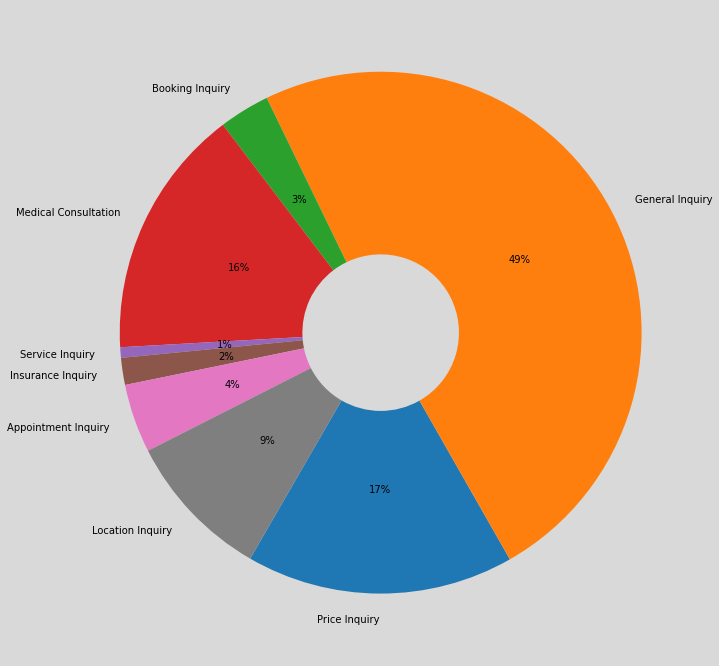

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig2 = plt.subplots(1, 1, figsize=(15, 12),facecolor='#d9d9d9')
objective_reason = df.tags.str.rstrip('-').str.split(' ').explode().replace({'': 'General Inquiry',
                                                                              'price': 'Price Inquiry',
                                                                              'service': 'Service Inquiry',
                                                                              'datetime': 'Appointment Inquiry',
                                                                              'place': 'Location Inquiry',
                                                                              'structure': 'General Inquiry',
                                                                              'insurance': 'Insurance Inquiry',
                                                                              'Medical_consult': 'Medical Consultation',
                                                                              'Booking': 'Booking Inquiry',
                                                                              'gen': 'General Conversation'
                                                                                         })
            
O = objective_reason.value_counts(sort=False)
O = pd.DataFrame({'Objective Categories': O.index, 'Count':  O.values})
plt.pie(O['Count'], labels = O['Objective Categories'],wedgeprops=dict(width=.7), autopct='%.0f%%',startangle= 240,textprops={'fontsize': 10})
plt.show()


<h3> LAMGARRAJ Mohamed</h3>

---


USMBA_FSDM_FES ---> Master: Web Intelligence and Data Science(WISD)



---



USPN_Paris ---> Master: Exploration Informatique des Données et Décisionnel(EID2)



---



linkedin: https://www.linkedin.com/in/mohamed-lamgarraj-61b3341a3/

kaggle: https://www.kaggle.com/mohamedlamgarraj

github: https://github.com/lmgrj